In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from PIL import Image
from tensorflow.keras.models import load_model

C:\Users\Juan\AppData\Local\Temp\ipykernel_328\2697553199.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Function to load an image, resize to 96x96, convert to gray scale and save in desired path

def load_process_save_image(image_filename: str,
                       target_size: tuple=(48, 48),
                       dir_path: str='./../data/raw/new_images/',
                       output_path: str='./../data/cleaned/new_images/'):
    '''
    - Takes an image (image_filename) from dir_path
    - Loads it into the notebook
    - Resizes to 96x96 to fit with the rest of the data
    - Transforms into grayscale
    - Saves the transformed image in output_path
    '''
    # Create output_path if it does not exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    if image_filename.endswith('.jpg') or image_filename.endswith('.jpeg') or image_filename.endswith('.png'):
        img_path = os.path.join(dir_path, image_filename)
        img = Image.open(img_path)

        # Resize image to 48x48
        img_resized = img.resize(target_size)

        # Convert image to grayscale
        img_grayscale = img_resized.convert('L')

        # Save image in output_path
        output_filename = os.path.join(output_path, image_filename)
        img_grayscale.save(output_filename)

    print(f'{image_filename} image processed')


In [3]:
# Function to normalize pixel values

def normalize(value):
    '''
    Normalized pixel values dividing by the max value.
    '''
    return value/255

In [4]:
# Function to convert the image into an array with pixel values

def image_to_array(image_filename: str,
                   dir_path: str='./../data/cleaned/new_images/',
                   desired_shape: tuple=(-1, 48, 48, 1)) -> np.array:
    '''
    Converts image file into pixel values as a numpy array. Each element of the array equals to the value of a pixel, from top left to bottom right of the image.
    Normalizes pixel values dividing each by 255.
    Reshapes image data to prepare it as input for nn model.
    Inputs:
    - filename: name of the image file
    - dir_path: path of the directory containing the image
    Outputs:
    - 
    '''
    filepath = os.path.join(dir_path, image_filename)
    
    img = Image.open(filepath)

    image_data = np.array(img)

    image_data_flattened = image_data.flatten()

    image_data_normalized = normalize(image_data_flattened)

    image_data_reshaped = image_data_normalized.reshape(desired_shape)

    return image_data_reshaped

In [5]:
# Function to load a HDF5 model

def load_h5_model(model_filename: str, dir_path_models: str='./../models/'):
    '''
    Loads a scaler saved as a HDF5 file.
    '''
    model_path = os.path.join(dir_path_models, model_filename)
    
    model = load_model(model_path)
    
    return model

In [6]:
# Function to obtain model predictions

def predict_image_label(model, 
                        image_data_reshaped,
                        labels: list=['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'],):

    pred_proba = model.predict(image_data_reshaped)

    pred = np.argmax(pred_proba)

    facial_exp = labels[pred]

    return facial_exp, pred_proba

In [7]:
# Function to plot the image and the class probabilities

def plot_image_prediction(image_filename: str,
                          pred_proba,
                          images_dir: str='./../data/cleaned/new_images/',
                          labels: list=['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']):

    '''
    Plots an image and a barplot with the prediction probability for each class.
    Inputs:
    - image_filename: name of the image file
    - images_dir: path of the directory where the images are saved
    Outputs:
    - None (seaborn plot with 2 axes)
    '''

    image_filepath = os.path.join(images_dir, image_filename)
    image_to_plot = Image.open(image_filepath)

    fig, axes = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [2, 5]})

    axes[0].imshow(image_to_plot, cmap='gray')
    axes[0].set_title('Image')

    sns.barplot(x=labels, y=pred_proba[0], hue=labels, palette='Set2', ax=axes[1])
    axes[1].set_title('Predictions')
    plt.show()

In [10]:
# Master function for demo

def demo_image_fe_pred(image_filename: str, model_filename: str):
    
    '''
    Plots and image and the class probability predictions for each facial expression.
    Inputs:
    - image_name: image file name
    Outputs:
    - None (image and class probability plot)
    '''

    load_process_save_image(image_filename=image_filename)

    image_data_reshaped = image_to_array(image_filename=image_filename)

    model = load_h5_model(model_filename=model_filename)

    facial_exp, pred_proba = predict_image_label(model, image_data_reshaped=image_data_reshaped)

    plot_image_prediction(image_filename=image_filename, pred_proba=pred_proba)

ta.png image processed
1/1 [==============================] - 0s 55ms/step


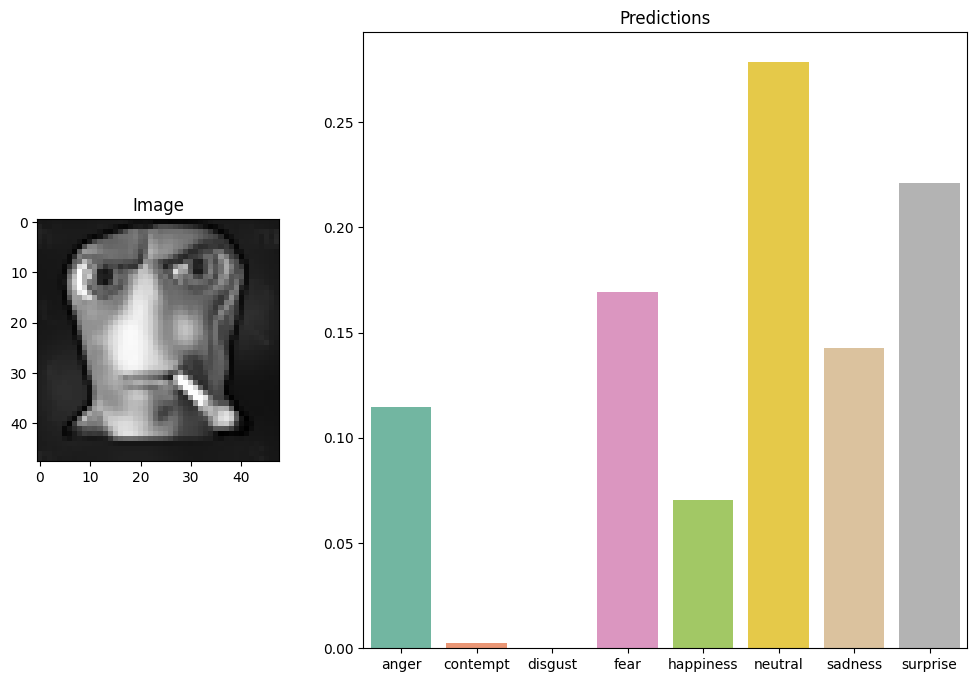

In [31]:
demo_image_fe_pred(image_filename='ta.png', model_filename='model1.h5')